In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from testing_initial_analysis import means_for_file2
from split_file1_into_1000rows_data import *
%matplotlib inline
import math

In [156]:
thresholds_for_disturbance=np.array([0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0])
thresholds_for_no_failure=np.array([0,1.67,1.52,1.66,1.59,1.67,2.34,1.96,1.75,1.77,2.02,5.27,1.99])
probabilities_df = pd.DataFrame({'No Failure':0.5*100,'leaf1':1/24*100,'leaf2':1/24*100,'leaf3':1/24*100,'leaf4':1/24*100,'leaf5':1/24*100,'leaf6':1/24*100,'leaf7':1/24*100,'leaf8':1/24*100,'spine1':1/24*100,'spine2':1/24*100,'spine3':1/24*100,'spine4':1/24*100},index=[0])

In [205]:
raw_data_test=pd.read_csv('file_2_copy.csv',index_col='time')

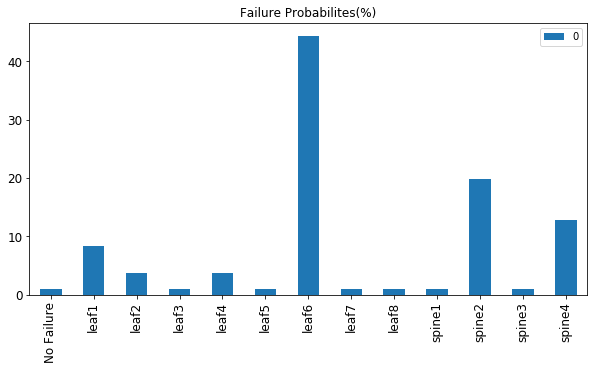

In [206]:
bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [207]:
input_and_output_test=pd.DataFrame(columns=['leaf1','leaf2','leaf3','leaf4','leaf5','leaf6','leaf7','leaf8','spine1','spine2','spine3','spine4'],index=raw_data_test.index)

In [208]:
for i in input_and_output_test:
    input_and_output_test[i] = raw_data_test[i+' input packet rate'] + raw_data_test[i+' output packet rate']

In [209]:
percentage_change_for_leaf1=[0]
i=0
while i < max(input_and_output_test['leaf1'].dropna().index):
    for j in input_and_output_test['leaf1'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_leaf1.append(((means_for_file2[1]-input_and_output_test.leaf1.dropna().loc[i:j].mean())/means_for_file2[1])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_leaf1)):
    if float(percentage_change_for_leaf1[i]) < thresholds_for_no_failure[1]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_leaf1[i]) > thresholds_for_no_failure[1] and float(percentage_change_for_leaf1[i]) < thresholds_for_disturbance[1]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_leaf1[i]) > thresholds_for_disturbance[1]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] += 20
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        

# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))


# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [210]:
probabilities_df

,No Failure,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6,leaf7,leaf8,spine1,spine2,spine3,spine4
0,33.4,5.605592,1.098682,-1.7,1.098682,-1.7,41.660877,-1.7,-1.7,-1.7,17.223663,-1.7,10.112503


In [211]:
percentage_change_for_leaf2=[0]
i=0
while i < max(input_and_output_test['leaf2'].dropna().index):
    for j in input_and_output_test['leaf2'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_leaf2.append(((means_for_file2[2]-input_and_output_test.leaf2.dropna().loc[i:j].mean())/means_for_file2[2])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_leaf2)):
    if float(percentage_change_for_leaf2[i]) < thresholds_for_no_failure[2]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_leaf2[i]) > thresholds_for_no_failure[2] and float(percentage_change_for_leaf2[i]) < thresholds_for_disturbance[2]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_leaf2[i]) > thresholds_for_disturbance[2]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] += 20
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        

# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))
        
# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [212]:
probabilities_df

,No Failure,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6,leaf7,leaf8,spine1,spine2,spine3,spine4
0,65.8,2.905592,-1.601318,-4.4,-1.601318,-4.4,38.960877,-4.4,-4.4,-4.4,14.523663,-4.4,7.412503


In [213]:
percentage_change_for_leaf3=[0]
i=0
while i < max(input_and_output_test['leaf3'].dropna().index):
    for j in input_and_output_test['leaf3'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_leaf3.append(((means_for_file2[3]-input_and_output_test.leaf3.dropna().loc[i:j].mean())/means_for_file2[3])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_leaf3)):
    if float(percentage_change_for_leaf3[i]) < thresholds_for_no_failure[3]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_leaf3[i]) > thresholds_for_no_failure[3] and float(percentage_change_for_leaf3[i]) < thresholds_for_disturbance[3]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_leaf3[i]) > thresholds_for_disturbance[3]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] += 20
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        


# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))

# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [214]:
probabilities_df

,No Failure,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6,leaf7,leaf8,spine1,spine2,spine3,spine4
0,98.2,0.205592,-4.301318,-7.1,-4.301318,-7.1,36.260877,-7.1,-7.1,-7.1,11.823663,-7.1,4.712503


In [215]:
percentage_change_for_leaf4=[0]
i=0
while i < max(input_and_output_test['leaf4'].dropna().index):
    for j in input_and_output_test['leaf4'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_leaf4.append(((means_for_file2[4]-input_and_output_test.leaf4.dropna().loc[i:j].mean())/means_for_file2[4])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_leaf4)):
    if float(percentage_change_for_leaf4[i]) < thresholds_for_no_failure[4]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_leaf4[i]) > thresholds_for_no_failure[4] and float(percentage_change_for_leaf4[i]) < thresholds_for_disturbance[4]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_leaf4[i]) > thresholds_for_disturbance[4]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] += 20
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        

# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))

        
# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [216]:
probabilities_df

,No Failure,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6,leaf7,leaf8,spine1,spine2,spine3,spine4
0,130.6,-2.494408,-7.001318,-9.8,-7.001318,-9.8,33.560877,-9.8,-9.8,-9.8,9.123663,-9.8,2.012503


In [217]:
percentage_change_for_leaf5=[0]
i=0
while i < max(input_and_output_test['leaf5'].dropna().index):
    for j in input_and_output_test['leaf5'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_leaf5.append(((means_for_file2[5]-input_and_output_test.leaf5.dropna().loc[i:j].mean())/means_for_file2[5])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_leaf5)):
    if float(percentage_change_for_leaf5[i]) < thresholds_for_no_failure[5]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_leaf5[i]) > thresholds_for_no_failure[5] and float(percentage_change_for_leaf5[i]) < thresholds_for_disturbance[5]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_leaf5[i]) > thresholds_for_disturbance[5]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] += 20
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        

# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))


        
# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [218]:
percentage_change_for_leaf6=[0]
i=0
while i < max(input_and_output_test['leaf6'].dropna().index):
    for j in input_and_output_test['leaf6'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_leaf6.append(((means_for_file2[6]-input_and_output_test.leaf6.dropna().loc[i:j].mean())/means_for_file2[6])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_leaf6)):
    if float(percentage_change_for_leaf6[i]) < thresholds_for_no_failure[6]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_leaf6[i]) > thresholds_for_no_failure[6] and float(percentage_change_for_leaf6[i]) < thresholds_for_disturbance[6]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_leaf6[i]) > thresholds_for_disturbance[6]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] += 20
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        

# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))

# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [219]:
percentage_change_for_leaf7=[0]
i=0
while i < max(input_and_output_test['leaf7'].dropna().index):
    for j in input_and_output_test['leaf7'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_leaf7.append(((means_for_file2[7]-input_and_output_test.leaf7.dropna().loc[i:j].mean())/means_for_file2[7])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_leaf7)):
    if float(percentage_change_for_leaf7[i]) < thresholds_for_no_failure[7]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_leaf7[i]) > thresholds_for_no_failure[7] and float(percentage_change_for_leaf7[i]) < thresholds_for_disturbance[7]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_leaf7[i]) > thresholds_for_disturbance[7]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] += 20
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        

# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))

# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [220]:
percentage_change_for_leaf8=[0]
i=0
while i < max(input_and_output_test['leaf8'].dropna().index):
    for j in input_and_output_test['leaf8'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_leaf8.append(((means_for_file2[8]-input_and_output_test.leaf8.dropna().loc[i:j].mean())/means_for_file2[8])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_leaf8)):
    if float(percentage_change_for_leaf8[i]) < thresholds_for_no_failure[8]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_leaf8[i]) > thresholds_for_no_failure[8] and float(percentage_change_for_leaf8[i]) < thresholds_for_disturbance[8]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_leaf8[i]) > thresholds_for_disturbance[8]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] += 20
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        

# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))

# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [221]:
percentage_change_for_spine1=[0]
i=0
while i < max(input_and_output_test['spine1'].dropna().index):
    for j in input_and_output_test['spine1'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_spine1.append(((means_for_file2[9]-input_and_output_test.spine1.dropna().loc[i:j].mean())/means_for_file2[9])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_spine1)):
    if float(percentage_change_for_spine1[i]) < thresholds_for_no_failure[9]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_spine1[i]) > thresholds_for_no_failure[9] and float(percentage_change_for_spine1[i]) < thresholds_for_disturbance[9]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_spine1[i]) > thresholds_for_disturbance[9]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] += 20
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        


# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))

        
# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [222]:
percentage_change_for_spine2=[0]
i=0
while i < max(input_and_output_test['spine2'].dropna().index):
    for j in input_and_output_test['spine2'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_spine2.append(((means_for_file2[10]-input_and_output_test.spine2.dropna().loc[i:j].mean())/means_for_file2[10])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_spine2)):
    if float(percentage_change_for_spine2[i]) < thresholds_for_no_failure[10]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_spine2[i]) > thresholds_for_no_failure[10] and float(percentage_change_for_spine2[i]) < thresholds_for_disturbance[10]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_spine2[i]) > thresholds_for_disturbance[10]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] += 20
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] -= 1
        

# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))


        
# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [223]:
probabilities_df

,No Failure,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6,leaf7,leaf8,spine1,spine2,spine3,spine4
0,323.8,-18.594408,-23.101318,-25.9,-23.101318,-25.9,17.460877,-25.9,-25.9,-25.9,-6.976337,-25.9,-14.087497


In [224]:
percentage_change_for_spine3=[0]
i=0
while i < max(input_and_output_test['spine3'].dropna().index):
    for j in input_and_output_test['spine3'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_spine3.append(((means_for_file2[11]-input_and_output_test.spine3.dropna().loc[i:j].mean())/means_for_file2[11])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_spine3)):
    if float(percentage_change_for_spine3[i]) < thresholds_for_no_failure[11]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_spine3[i]) > thresholds_for_no_failure[11] and float(percentage_change_for_spine3[i]) < thresholds_for_disturbance[11]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_spine3[i]) > thresholds_for_disturbance[11]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] += 20
        probabilities_df['spine4'] -= 1
        


# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))

        
# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [225]:
percentage_change_for_spine4=[0]
i=0
while i < max(input_and_output_test['spine4'].dropna().index):
    for j in input_and_output_test['spine4'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_spine4.append(((means_for_file2[12]-input_and_output_test.spine4.dropna().loc[i:j].mean())/means_for_file2[12])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_spine4)):
    if float(percentage_change_for_spine4[i]) < thresholds_for_no_failure[12]:
        probabilities_df['No Failure'] += 1.2
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_spine4[i]) > thresholds_for_no_failure[12] and float(percentage_change_for_spine4[i]) < thresholds_for_disturbance[12]:
        probabilities_df['No Failure'] -= 1.2
        probabilities_df['leaf1'] += 0.1
        probabilities_df['leaf2'] += 0.1
        probabilities_df['leaf3'] += 0.1
        probabilities_df['leaf4'] += 0.1
        probabilities_df['leaf5'] += 0.1
        probabilities_df['leaf6'] += 0.1
        probabilities_df['leaf7'] += 0.1
        probabilities_df['leaf8'] += 0.1
        probabilities_df['spine1'] += 0.1
        probabilities_df['spine2'] += 0.1
        probabilities_df['spine3'] += 0.1
        probabilities_df['spine4'] += 0.1
        
    if float(percentage_change_for_spine4[i]) > thresholds_for_disturbance[12]:
        probabilities_df['No Failure'] -= 9
        probabilities_df['leaf1'] -= 1
        probabilities_df['leaf2'] -= 1
        probabilities_df['leaf3'] -= 1
        probabilities_df['leaf4'] -= 1
        probabilities_df['leaf5'] -= 1
        probabilities_df['leaf6'] -= 1
        probabilities_df['leaf7'] -= 1
        probabilities_df['leaf8'] -= 1
        probabilities_df['spine1'] -= 1
        probabilities_df['spine2'] -= 1
        probabilities_df['spine3'] -= 1
        probabilities_df['spine4'] += 20
        


# while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
#     additional_prob=0
#     denom=0
#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])<=1:
#             additional_prob=additional_prob+(1-probabilities_df[i])
#             probabilities_df.set_value(0,i,1)
#         if float(probabilities_df[i])>1:
#             denom=denom+probabilities_df[i]

#     for i in probabilities_df.columns:
#         if float(probabilities_df[i])>1:
#             probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))

        
# bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [226]:
probabilities_df

,No Failure,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6,leaf7,leaf8,spine1,spine2,spine3,spine4
0,388.6,-23.994408,-28.501318,-31.3,-28.501318,-31.3,12.060877,-31.3,-31.3,-31.3,-12.376337,-31.3,-19.487497


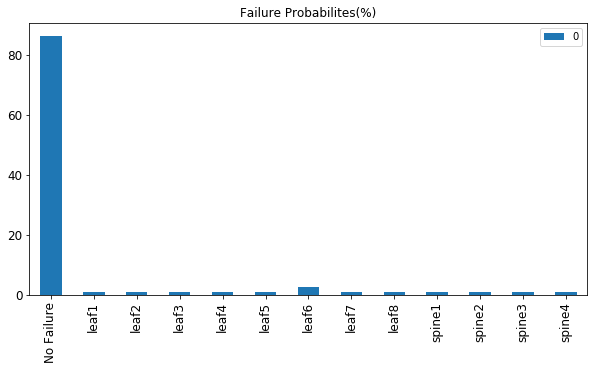

In [227]:
while probabilities_df.loc[0][0] <1 or probabilities_df.loc[0][1] <1 or probabilities_df.loc[0][2] <1 or probabilities_df.loc[0][3] <1 or probabilities_df.loc[0][4] <1 or probabilities_df.loc[0][5] <1 or probabilities_df.loc[0][6] <1 or probabilities_df.loc[0][7] <1 or probabilities_df.loc[0][8] <1 or probabilities_df.loc[0][9] <1 or probabilities_df.loc[0][10] <1 or probabilities_df.loc[0][11] <1 or probabilities_df.loc[0][12] <1:  
    additional_prob=0
    denom=0
    for i in probabilities_df.columns:
        if float(probabilities_df[i])<=1:
            additional_prob=additional_prob+(1-probabilities_df[i])
            probabilities_df.set_value(0,i,1)
        if float(probabilities_df[i])>1:
            denom=denom+probabilities_df[i]

    for i in probabilities_df.columns:
        if float(probabilities_df[i])>1:
            probabilities_df[i]=(probabilities_df[i]-((probabilities_df[i]/denom)*additional_prob))

        
bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [228]:
probabilities_df

,No Failure,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6,leaf7,leaf8,spine1,spine2,spine3,spine4
0,86.320881,1.0,1.0,1.0,1.0,1.0,2.679119,1.0,1.0,1.0,1.0,1.0,1.0
